In [ ]:
Make sure you have the gpu on ...
Edit >> notebook settings

In [59]:
!nvidia-smi

Sun Sep 27 19:11:45 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 450.66       Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8    10W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Set the GAN up

In [5]:
!git clone https://github.com/taesungp/contrastive-unpaired-translation.git

Cloning into 'contrastive-unpaired-translation'...
remote: Enumerating objects: 235, done.
remote: Counting objects: 100% (235/235), done.
remote: Compressing objects: 100% (172/172), done.
remote: Total 235 (delta 115), reused 172 (delta 58), pack-reused 0
Receiving objects: 100% (235/235), 17.89 MiB | 31.59 MiB/s, done.
Resolving deltas: 100% (115/115), done.


In [6]:
import os
print(os.getcwd())
os.chdir('contrastive-unpaired-translation')


/content


In [7]:
!pip install -r requirements.txt

     |████████████████████████████████| 686kB 9.5MB/s 
     |████████████████████████████████| 204kB 19.3MB/s 
  Created wheel for visdom: filename=visdom-0.1.8.9-cp36-none-any.whl size=655251 sha256=c3d7207080e1a4c8bc4df5b7bedc7fd1e9f703d56b17986f38e40450ffee6628
  Stored in directory: /root/.cache/pip/wheels/70/19/a7/6d589ed967f4dfefd33bc166d081257bd4ed0cb618dccfd62a
  Created wheel for GPUtil: filename=GPUtil-1.4.0-cp36-none-any.whl size=7411 sha256=338c1378a7230ea2a4c0d1b37232d361f58df862b9aa60db2e7c9c7ed8edda8c
  Stored in directory: /root/.cache/pip/wheels/3d/77/07/80562de4bb0786e5ea186911a2c831fdd0018bda69beab71fd
  Created wheel for torchfile: filename=torchfile-0.1.0-cp36-none-any.whl size=5711 sha256=c8b031dcd0d775a042d547d4444a09e353704dd2ea1333c792bdca09acbd63ef
  Stored in directory: /root/.cache/pip/wheels/b1/c3/d6/9a1cc8f3a99a0fc1124cae20153f36af59a6e683daca0a0814
Successfully built visdom GPUtil torchfile


Download data

In [38]:
!ls ./datasets/cryoem
!mkdir ./datasets/cryoem/trainA
!mkdir ./datasets/cryoem/trainB

trainA	trainB
mkdir: cannot create directory ‘./datasets/cryoem/trainA’: File exists
mkdir: cannot create directory ‘./datasets/cryoem/trainB’: File exists


In [39]:
import urllib.request
print(urllib.request.urlretrieve("https://ckinzthompson.github.io/img/em/em.jpg", "./datasets/cryoem/trainA/em.jpg"))
print(urllib.request.urlretrieve("https://ckinzthompson.github.io/img/em/stain.jpg", "./datasets/cryoem/trainB/stain.jpg"))

('./datasets/cryoem/trainA/em.jpg', <http.client.HTTPMessage object at 0x7f4392f50048>)
('./datasets/cryoem/trainB/stain.jpg', <http.client.HTTPMessage object at 0x7f4392f50048>)


Run the training


In [49]:
!python train.py --model sincut --name cryoem --dataroot ./datasets/cryoem

----------------- Options ---------------
                 CUT_mode: CUT                           
               batch_size: 16                            
                    beta1: 0.0                           
                    beta2: 0.99                          
          checkpoints_dir: ./checkpoints                 
           continue_train: False                         
                crop_size: 64                            
                 dataroot: ./datasets/cryoem             	[default: placeholder]
             dataset_mode: singleimage                   
                direction: AtoB                          
              display_env: main                          
             display_freq: 400                           
               display_id: None                          
            display_ncols: 4                             
             display_port: 8097                          
           display_server: http://localhost              
       

In [51]:
!python test.py --model sincut --name cryoem --dataroot ./datasets/cryoem

----------------- Options ---------------
                 CUT_mode: CUT                           
               batch_size: 1                             
                    beta1: 0.0                           
                    beta2: 0.99                          
          checkpoints_dir: ./checkpoints                 
                crop_size: 64                            
                 dataroot: ./datasets/cryoem             	[default: placeholder]
             dataset_mode: singleimage                   
                direction: AtoB                          
          display_winsize: 256                           
               easy_label: experiment_name               
                    epoch: latest                        
                     eval: False                         
        flip_equivariance: False                         
                 gan_mode: nonsaturating                 
                  gpu_ids: 0                             
       

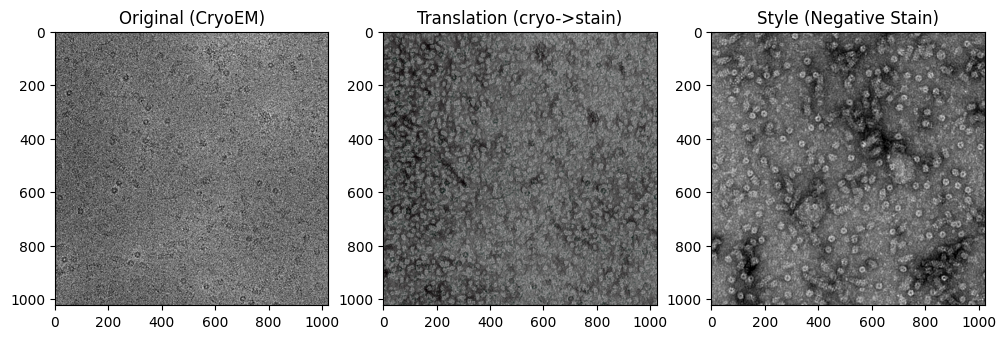

In [63]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(1,3,figsize=(12,18),dpi=100)
img1 = plt.imread('./results/cryoem/test_latest/images/fake_B/em.png')
img2 = plt.imread('./results/cryoem/test_latest/images/real_A/em.png')
img3 = plt.imread('./results/cryoem/test_latest/images/real_B/em.png')
ax[0].set_title('Original (CryoEM)')
ax[1].set_title('Translation (cryo->stain)')
ax[2].set_title('Style (Negative Stain)')
ax[1].imshow(img1)
ax[0].imshow(img2)
ax[2].imshow(img3)
plt.savefig('cryoem_test_img.png')
